In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

In [17]:
# Load and clean data
df = pd.read_csv("FINAL CAPSTONE DATA SETS.csv")
df.columns = ["Week", "Cases", "Deaths"]
df["Cases"] = pd.to_numeric(df["Cases"], errors='coerce')
df["Deaths"] = pd.to_numeric(df["Deaths"], errors='coerce')
df_clean = df.dropna()
print("Cleaned data points:", len(df_clean))

Cleaned data points: 100


In [18]:
# NumPy statistics
print("Mean Cases:", np.mean(df_clean["Cases"]))
print("Median Deaths:", np.median(df_clean["Deaths"]))
print("Std Dev Cases:", np.std(df_clean["Cases"]))
print("Max Deaths:", np.max(df_clean["Deaths"]))
print("Min Cases:", np.min(df_clean["Cases"]))

Mean Cases: 5065383.75
Median Deaths: 55146.0
Std Dev Cases: 4567384.560090271
Max Deaths: 102044
Min Cases: 833591


In [19]:
# SciPy correlation
corr, p = pearsonr(df_clean["Cases"], df_clean["Deaths"])
print("Correlation Coefficient:", corr)
print("P-value:", p)

Correlation Coefficient: 0.08284513004881683
P-value: 0.41253225610211963


In [20]:
# Statsmodels regression
X = sm.add_constant(df_clean["Cases"])
model = sm.OLS(df_clean["Deaths"], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6773
Date:                Mon, 26 May 2025   Prob (F-statistic):              0.413
Time:                        00:41:39   Log-Likelihood:                -1128.4
No. Observations:                 100   AIC:                             2261.
Df Residuals:                      98   BIC:                             2266.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.677e+04   2902.683     19.558      0.0

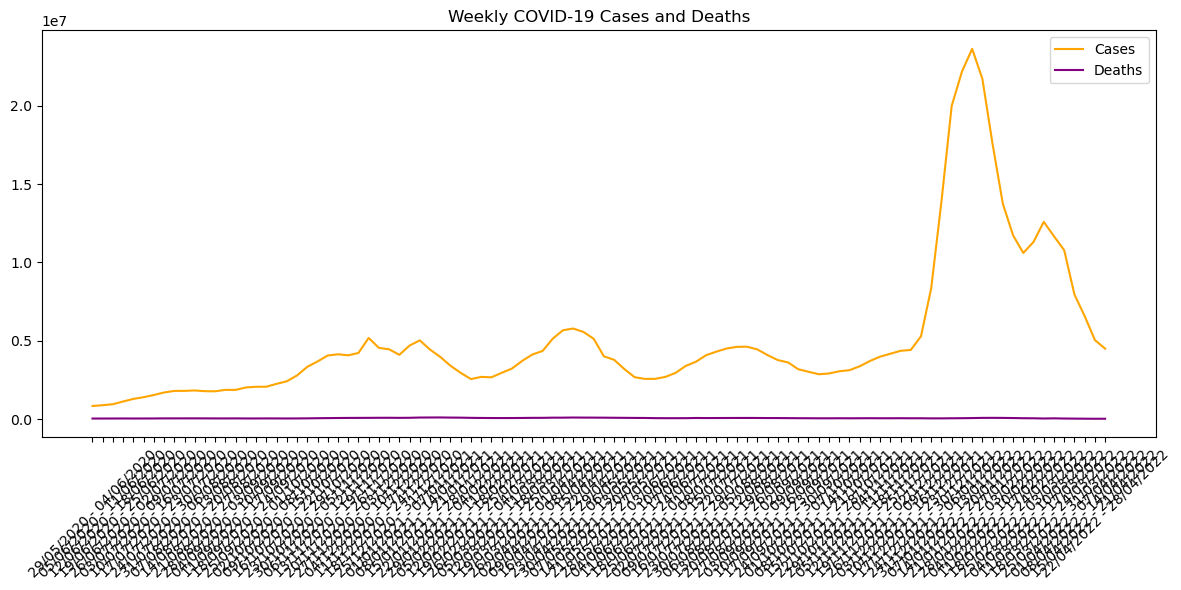

In [21]:
# Visualization 1 - Line Graph
plt.figure(figsize=(12, 6))
plt.plot(df_clean["Week"], df_clean["Cases"], label="Cases", color="orange")
plt.plot(df_clean["Week"], df_clean["Deaths"], label="Deaths", color="purple")
plt.xticks(rotation=45)
plt.legend()
plt.title("Weekly COVID-19 Cases and Deaths")
plt.tight_layout()
plt.show()

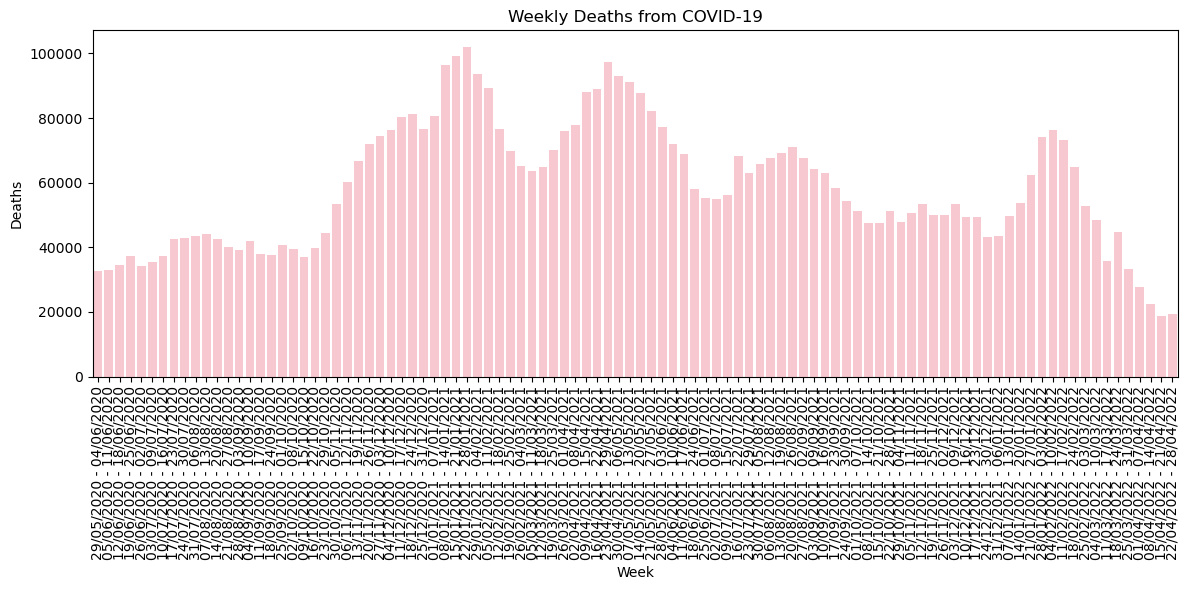

In [22]:
# Visual 2 - Bar Graph
plt.figure(figsize=(12, 6))
sns.barplot(x="Week", y="Deaths", data=df_clean, color="pink")
plt.xticks(rotation=90)
plt.title("Weekly Deaths from COVID-19")
plt.tight_layout()
plt.show()

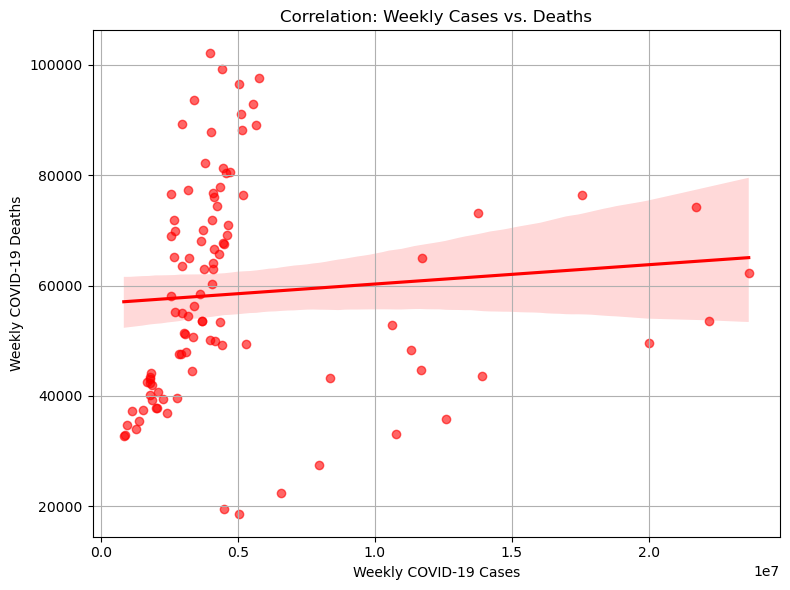

In [23]:
# Correlation between the two variables and regressiom line
plt.figure(figsize=(8, 6))
sns.regplot(x="Cases", y="Deaths", data=df_clean, color="red", scatter_kws={"alpha":0.6})
plt.title("Correlation: Weekly Cases vs. Deaths")
plt.xlabel("Weekly COVID-19 Cases")
plt.ylabel("Weekly COVID-19 Deaths")
plt.grid(True)
plt.tight_layout()
plt.show()